In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [19]:
df = pd.read_csv('../data/practice/passengers.csv')
df.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


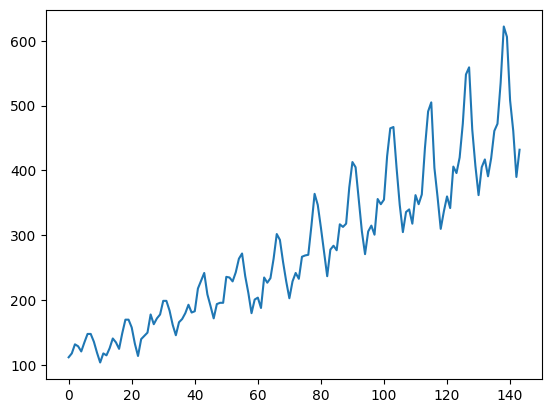

In [18]:
plt.plot(df["Passengers"])

In [22]:
from statsmodels.tsa.stattools import adfuller

In [50]:
def adFulersTest(ts: list, name, alpha=0.05):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', 'Lags Used', 'Number of observations used'])

    for key, val in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = val

    print(f"Тест \"{name}\":")
    print(dfoutput)

    if dfoutput['p-value'] < alpha:
        print(f"Значение p меньше {alpha*100.0} %. Ряд стационарный")
    else:
        print(f"Значение p меньше {alpha*100.0} %. Ряд не стационарный\n")

adFulersTest(df["Passengers"], "Пассажиры")

Тест "Пассажиры":
Test Statistics                  0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0 %. Ряд не стационарный



In [51]:
nottrend = []

s = 6
notseason = []

for i in range(1, len(df['Passengers'])):
    nottrend.append(df['Passengers'][i] - df['Passengers'][i-1])

for i in range(s, len(df['Passengers'])):
    notseason.append(df['Passengers'][i] - df['Passengers'][i-s])

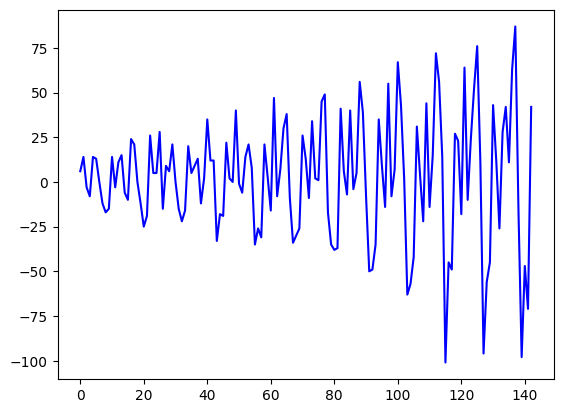

In [52]:
plt.plot(nottrend, color='blue')

In [53]:
adFulersTest(nottrend, "Пассажиры без тренда")

Тест "Пассажиры без тренда":
Test Statistics                 -2.829267
p-value                          0.054213
Lags Used                       12.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0 %. Ряд не стационарный



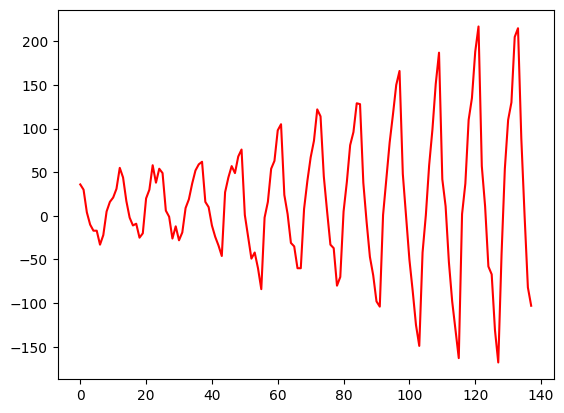

In [45]:
plt.plot(notseason, color='red')

In [54]:
adFulersTest(notseason, "Пассажиры без сезонности")

Тест "Пассажиры без сезонности":
Test Statistics                 -3.154446
p-value                          0.022778
Lags Used                        7.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64
Значение p меньше 5.0 %. Ряд стационарный


In [55]:
from scipy.stats import boxcox

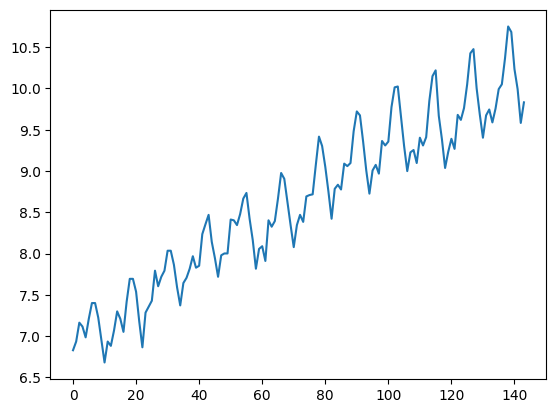

In [57]:
transformed_data, best_lambda = boxcox(df['Passengers'])

plt.plot(transformed_data)

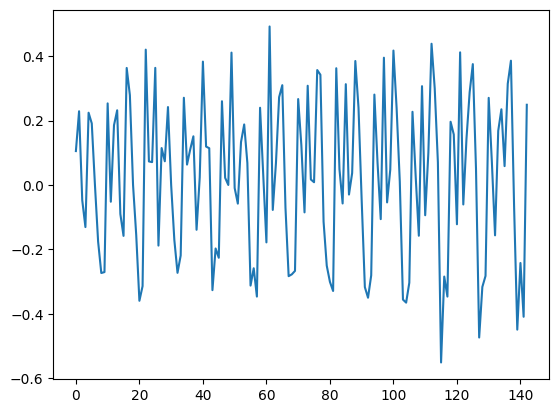

In [59]:
pnottrend = []

for i in range(1, len(transformed_data)):
    pnottrend.append(transformed_data[i] - transformed_data[i-1])

plt.plot(pnottrend)

In [60]:
adFulersTest(pnottrend, "Пассажиры без тренда boxcox")

Тест "Пассажиры без тренда boxcox":
Test Statistics                 -2.871708
p-value                          0.048738
Lags Used                       14.000000
Number of observations used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64
Значение p меньше 5.0 %. Ряд стационарный


Авторегрессия

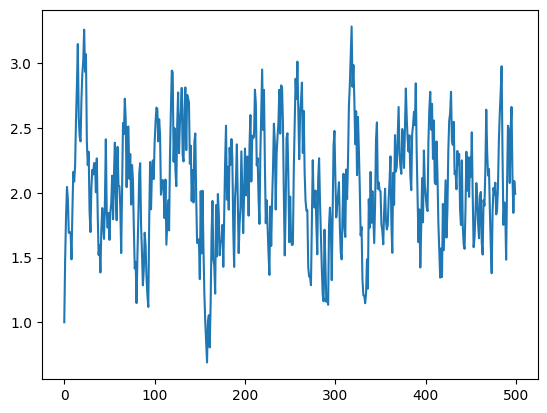

In [81]:
N = 500

arl = [1]
arlNegative = [1]
arl2 = [1]

for i in range(1, N):
    arl.append(0.76 * arl[i-1] + np.random.random())
    arlNegative.append(-0.76 * arlNegative[i-1] + np.random.random())
    arl2.append(2 * arl2[i-1] + np.random.random())

plt.plot(arl)

In [68]:
print(f"Sd = {np.std(arl)}\nMean = {np.mean(arl)}")

Sd = 0.43404349361530237
Mean = 2.0824225840856188


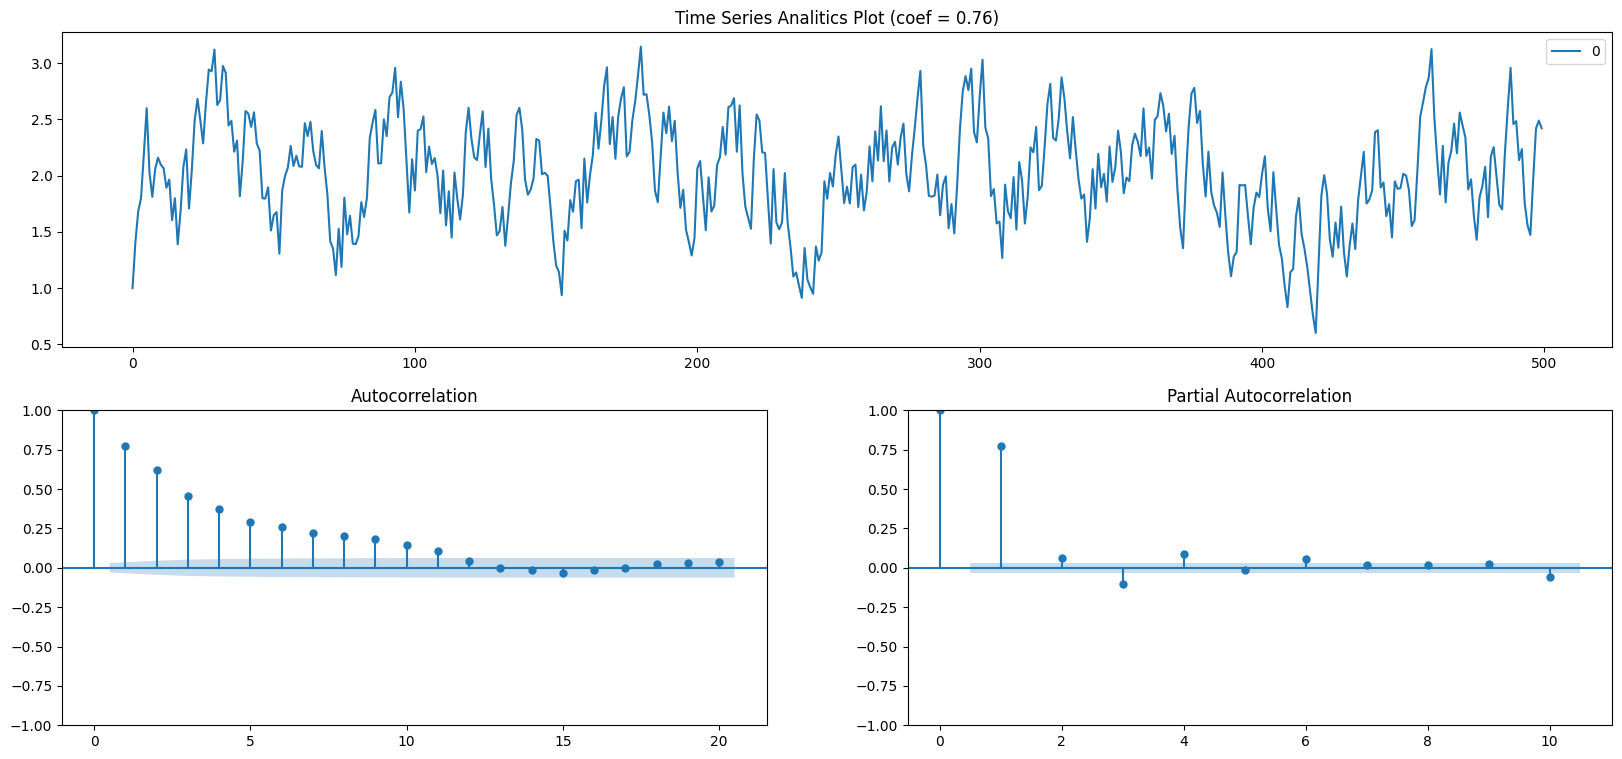

In [79]:
ts = pd.DataFrame(arl)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)

ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title("Time Series Analitics Plot (coef = 0.76)")

smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

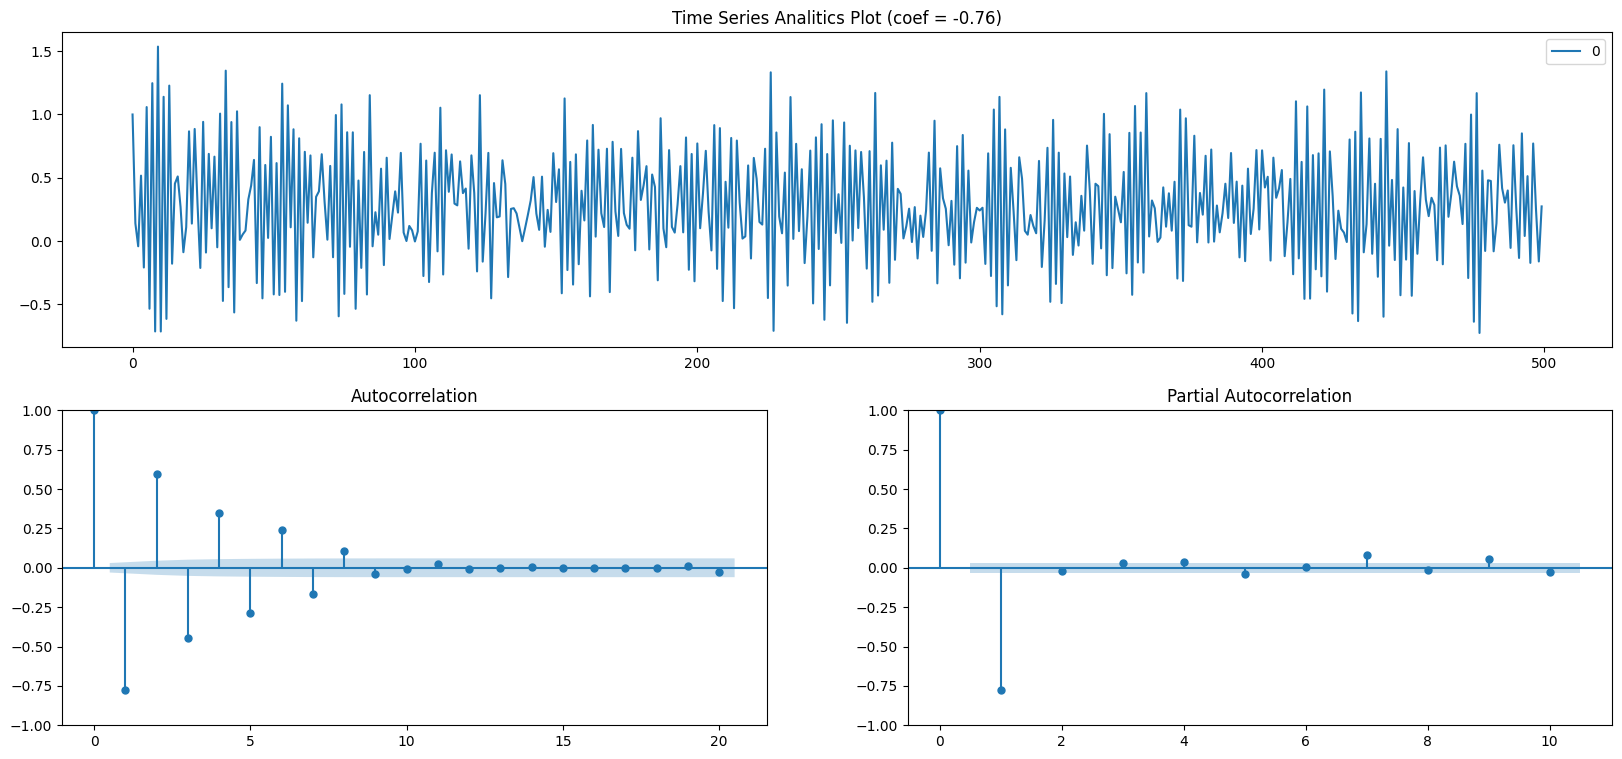

In [78]:
ts = pd.DataFrame(arlNegative)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)

ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title("Time Series Analitics Plot (coef = -0.76)")

smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

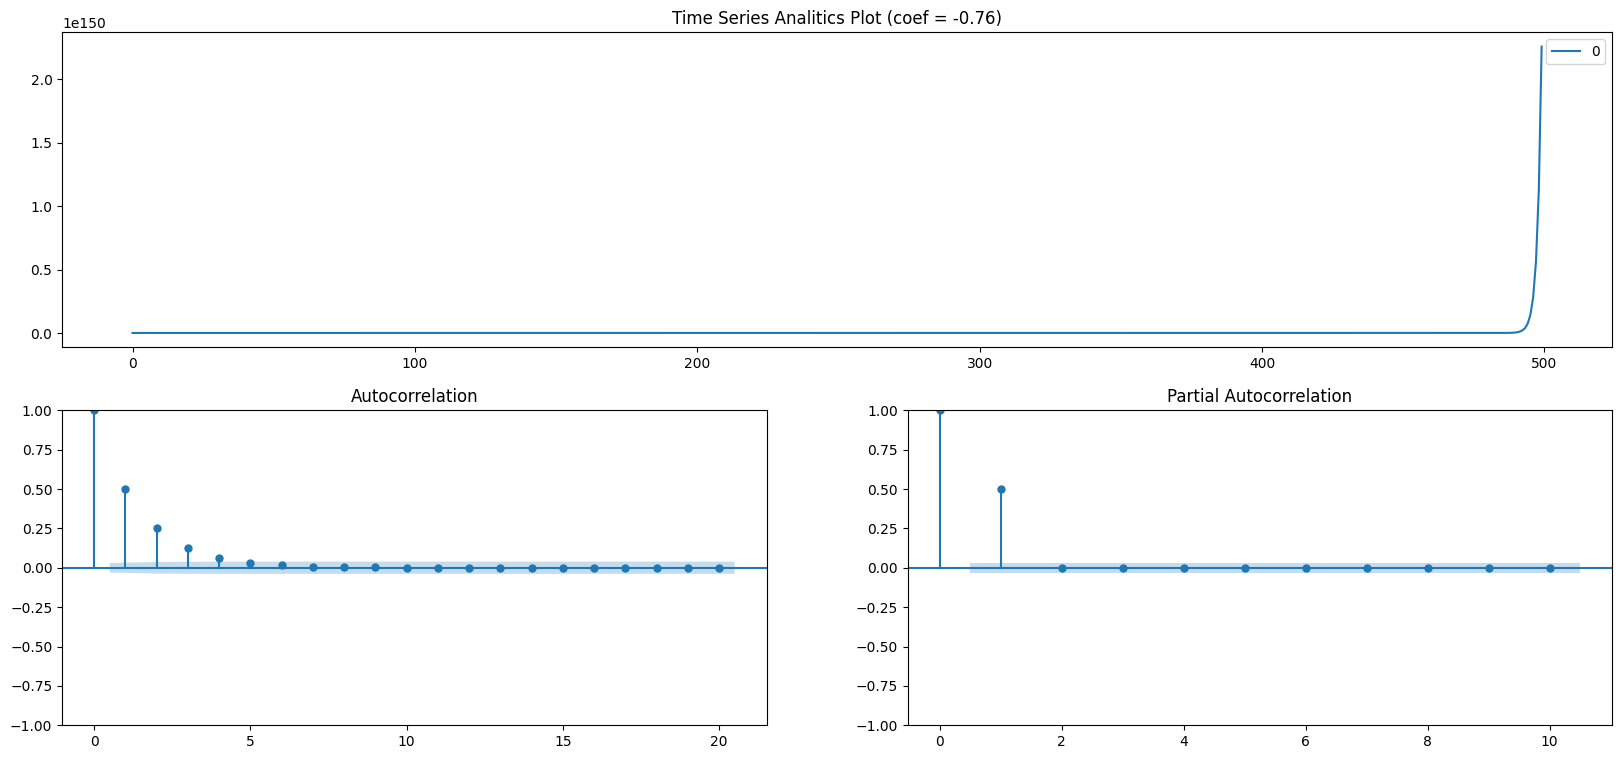

In [82]:
ts = pd.DataFrame(arl2)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)

ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title("Time Series Analitics Plot (coef = -0.76)")

smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

Предсказываем

In [88]:
dfp = pd.read_csv('../data/practice/passengers.csv', names=["n", "x"], skiprows=1)

dfp['t'] = df.index.values

dfp

,n,x,t
0,1949-01,112,0
1,1949-02,118,1
2,1949-03,132,2
3,1949-04,129,3
4,1949-05,121,4
...,...,...,...
139,1960-08,606,139
140,1960-09,508,140
141,1960-10,461,141
142,1960-11,390,142


In [94]:
ln = len(dfp)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90, 0))

train_df = dfp[dfp['t'] <= train_cutoff]
validate_df = dfp[(dfp['t'] > train_cutoff) & (dfp['t'] <= validate_cutoff)]
forecast_df = dfp[dfp['t'] > validate_cutoff]


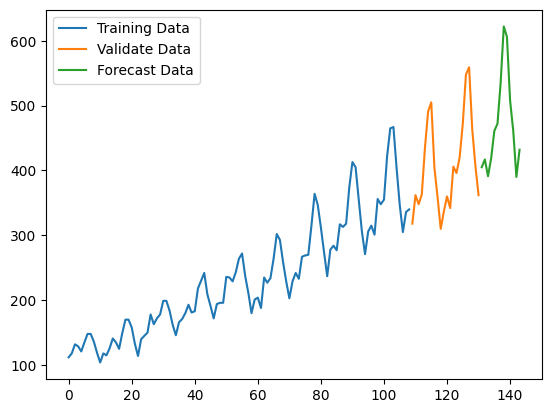

In [96]:
plt.plot(train_df.t, train_df.x, label="Training Data")
plt.plot(validate_df.t, validate_df.x, label="Validate Data")
plt.plot(forecast_df.t, forecast_df.x, label="Forecast Data")

plt.legend()

In [98]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [102]:
mod = AutoReg(df.t, 3, old_names=False)

res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  144
Model:                     AutoReg(3)   Log Likelihood                4014.220
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 06 Oct 2023   AIC                          -8018.440
Time:                        16:27:51   BIC                          -8003.696
Sample:                             3   HQIC                         -8012.448
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   5.86e-15   1.14e+14      0.000       0.667       0.667
t.L1           1.0000    5.8e-15   1.72e+14      0.000       1.000       1.000
t.L2           0.3333   7.16e-17   4.65e+15      0.0

In [104]:
res2 = mod.fit(cov_type="HC0")

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  144
Model:                     AutoReg(3)   Log Likelihood                4014.220
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 06 Oct 2023   AIC                          -8018.440
Time:                        16:29:17   BIC                          -8003.696
Sample:                             3   HQIC                         -8012.448
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   5.86e-15   1.14e+14      0.000       0.667       0.667
t.L1           1.0000    5.8e-15   1.72e+14      0.000       1.000       1.000
t.L2           0.3333   7.16e-17   4.65e+15      0.0

In [108]:
sel = ar_select_order(dfp.x, 13, old_names=False)
res = sel.model.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  144
Model:                    AutoReg(13)   Log Likelihood                -497.994
Method:               Conditional MLE   S.D. of innovations             10.832
Date:                Fri, 06 Oct 2023   AIC                           1025.988
Time:                        16:31:56   BIC                           1069.116
Sample:                            13   HQIC                          1043.513
                                  144                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1490      2.857      1.802      0.072      -0.451      10.749
x.L1           0.7608      0.070     10.885      0.000       0.624       0.898
x.L2          -0.0853      0.069     -1.229      0.2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


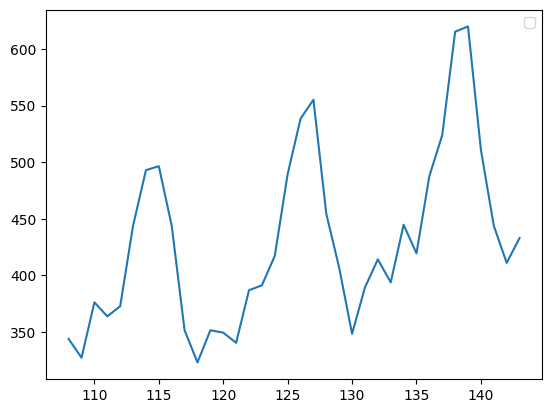

In [109]:
fig = res.plot_predict(train_cutoff)

In [111]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=validate_cutoff, dynamic=False)
f_pred = res.predict(start=validate_cutoff+1, end=forecast_df.t[len(df.t)-1], dynamic=False)

Text(0.5, 1.0, 'Airline passangers by month')

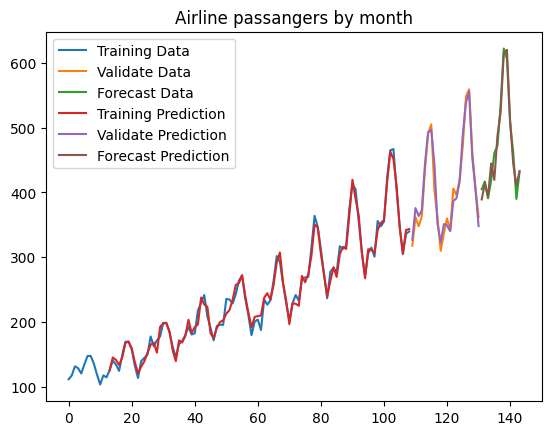

In [117]:
plt.plot(train_df.t, train_df.x, label="Training Data")
plt.plot(validate_df.t, validate_df.x, label="Validate Data")
plt.plot(forecast_df.t, forecast_df.x, label="Forecast Data")
plt.plot(train_df.t, pred, label="Training Prediction")
plt.plot(validate_df.t, v_pred, label="Validate Prediction")
plt.plot(forecast_df.t, f_pred, label="Forecast Prediction")

plt.legend()
plt.title("Airline passangers by month")